# Tolman-Oppenheimer-Volkov example for O$_2$sclpy

See the O$_2$sclpy documentation at https://awsteiner.org/code/o2sclpy for more information.

In [1]:
import o2sclpy
import matplotlib.pyplot as plot
import ctypes
import numpy
import sys

plots=True
if 'pytest' in sys.modules:
    plots=False

Link the O$_2$scl library:

In [2]:
link=o2sclpy.linker()
link.link_o2scl()

This is the APR EOS as computed in ``o2scl/examples/ex_eos_had_apr.cpp``.

In [3]:
eos=[[4.500000e-02,2.156413e-01,6.998033e-04],
     [8.500000e-02,4.084332e-01,2.456061e-03],
     [1.250000e-01,6.025862e-01,7.007571e-03],
     [1.650000e-01,7.987918e-01,1.572468e-02],
     [2.040000e-01,9.927169e-01,2.946785e-02],
     [2.440000e-01,1.193221e+00,3.249203e-02],
     [2.840000e-01,1.395525e+00,5.124024e-02],
     [3.240000e-01,1.600975e+00,7.771385e-02],
     [3.640000e-01,1.810261e+00,1.139703e-01],
     [4.040000e-01,2.024147e+00,1.620335e-01],
     [4.440000e-01,2.243442e+00,2.238295e-01],
     [4.840000e-01,2.468981e+00,3.012283e-01],
     [5.240000e-01,2.701614e+00,3.960900e-01],
     [5.640000e-01,2.942202e+00,5.102769e-01],
     [6.040000e-01,3.191619e+00,6.456452e-01],
     [6.440000e-01,3.450743e+00,8.040340e-01],
     [6.840000e-01,3.720458e+00,9.872584e-01],
     [7.240000e-01,4.001649e+00,1.197107e+00],
     [7.640000e-01,4.295201e+00,1.435340e+00],
     [8.040000e-01,4.602000e+00,1.703690e+00],
     [8.440000e-01,4.922926e+00,2.003863e+00],
     [8.840000e-01,5.258860e+00,2.337541e+00],
     [9.240000e-01,5.610674e+00,2.706378e+00],
     [9.640000e-01,5.979240e+00,3.112009e+00],
     [1.004000e+00,6.365422e+00,3.556046e+00],
     [1.044000e+00,6.770081e+00,4.040080e+00],
     [1.084000e+00,7.194071e+00,4.565686e+00],
     [1.124000e+00,7.638242e+00,5.134417e+00],
     [1.164000e+00,8.103438e+00,5.747813e+00],
     [1.204000e+00,8.590497e+00,6.407393e+00],
     [1.244000e+00,9.100252e+00,7.114660e+00],
     [1.284000e+00,9.633531e+00,7.871098e+00],
     [1.324000e+00,1.019116e+01,8.678169e+00],
     [1.364000e+00,1.077394e+01,9.537317e+00],
     [1.404000e+00,1.138270e+01,1.044996e+01],
     [1.444000e+00,1.201824e+01,1.141747e+01],
     [1.484000e+00,1.268134e+01,1.244122e+01],
     [1.524000e+00,1.337281e+01,1.352252e+01],
     [1.564000e+00,1.409343e+01,1.466262e+01],
     [1.604000e+00,1.484397e+01,1.586275e+01],
     [1.644000e+00,1.562519e+01,1.712404e+01],
     [1.684000e+00,1.643786e+01,1.844757e+01],
     [1.724000e+00,1.728270e+01,1.983432e+01],
     [1.764000e+00,1.816046e+01,2.128515e+01],
     [1.804000e+00,1.907185e+01,2.280082e+01],
     [1.844000e+00,2.001758e+01,2.438194e+01],
     [1.884000e+00,2.099830e+01,2.602899e+01],
     [1.924000e+00,2.201470e+01,2.774223e+01],
     [1.964000e+00,2.306741e+01,2.952175e+01]]

Create a table, the columns, and the units for each column

In [4]:
tab=o2sclpy.table_units(link)
tab.line_of_names("nb ed pr")
tab.line_of_units("1/fm^3 1/fm^4 1/fm^4")

Fill the table with the Python data

In [5]:
for i in range(0,len(eos)):
    tab.line_of_data([eos[i][j] for j in range(0,3)])

Create a new column in the table for the chemical
potential

In [6]:
tab.function_column('(ed+pr)/nb','mu')

Create the object which interpolates the EOS for the TOV
solver. Use the default crust EOS.

In [7]:
eti=o2sclpy.eos_tov_interp(link)
eti.default_low_dens_eos()
eti.read_table(tab,'ed','pr','nb')

Specify the EOS and determine the M-R curve

In [8]:
ts=o2sclpy.tov_solve(link)
ts.set_eos(eti)
ts.mvsr()

Mass versus radius mode.
Central P: 7.0000e-07 (Msun/km^3), M: 1.0722e-01 (Msun), R: 5.7745e+01 (km)
Central P: 7.7000e-07 (Msun/km^3), M: 1.1205e-01 (Msun), R: 4.6451e+01 (km)
Central P: 8.4700e-07 (Msun/km^3), M: 1.1754e-01 (Msun), R: 3.8926e+01 (km)
Central P: 9.3170e-07 (Msun/km^3), M: 1.2361e-01 (Msun), R: 3.3646e+01 (km)
Central P: 1.0249e-06 (Msun/km^3), M: 1.3020e-01 (Msun), R: 2.9792e+01 (km)
Central P: 1.1274e-06 (Msun/km^3), M: 1.3722e-01 (Msun), R: 2.6891e+01 (km)
Central P: 1.2401e-06 (Msun/km^3), M: 1.4460e-01 (Msun), R: 2.4649e+01 (km)
Central P: 1.3641e-06 (Msun/km^3), M: 1.5264e-01 (Msun), R: 2.2817e+01 (km)
Central P: 1.5005e-06 (Msun/km^3), M: 1.6165e-01 (Msun), R: 2.1265e+01 (km)
Central P: 1.6506e-06 (Msun/km^3), M: 1.7164e-01 (Msun), R: 1.9961e+01 (km)
Central P: 1.8156e-06 (Msun/km^3), M: 1.8259e-01 (Msun), R: 1.8868e+01 (km)
Central P: 1.9972e-06 (Msun/km^3), M: 1.9444e-01 (Msun), R: 1.7954e+01 (km)
Central P: 2.1969e-06 (Msun/km^3), M: 2.0714e-01 (Msun), R: 1.7

0

Obtain the table of results and the maximum mass

In [9]:
mvsr_table=ts.get_results()
print('M_max: %7.6e' % mvsr_table.max("gm"))

M_max: 2.192160e+00


Delete rows in the table which correspond to unstable configurations

In [10]:
mvsr_table.set_nlines(mvsr_table.lookup("gm",mvsr_table.max("gm"))+1)

Plot the mass-radius curve

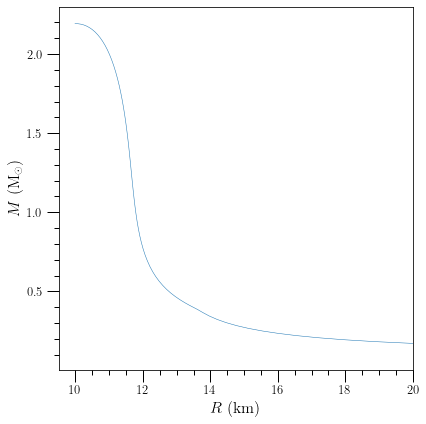

In [11]:
if plots:
    p=o2sclpy.plot_base()
    p.xlimits(9.5,20)
    p.plot([mvsr_table,'r','gm'])
    p.xtitle(r'$ R~(\mathrm{km}) $')
    p.ytitle(r'$ M~(\mathrm{M}_{\odot}) $')
    p.show()

For testing using ``pytest``:

In [12]:
def test_fun():
    assert numpy.allclose(mvsr_table.max("gm"),2.192,rtol=4.0e-4)
    return